In [26]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# %matplotlib inline

# from sklearn.metrics import mean_squared_error

# statsmodels
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import kpss, adfuller
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# import pmdarima as pm
#from datetime import timedelta, date
# import joblib
# import pickle

#from osisoft.pidevclub.piwebapi.pi_web_api_client import PIWebApiClient
#from osisoft.pidevclub.piwebapi.models import PIAnalysis, PIItemsStreamValues, PIStreamValues, PITimedValue, PIRequest
# import time
# import math
#import urllib3
# import json
# import requests
# import re

In [27]:
# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [28]:
# koneksi
webapi = 'https://pivision.indonesiapower.corp/piwebapi'
#pernah gagal klo pake user domain indonesiapower
username = 'pisystem'
password = 'Abcd1234!'

#def getPIWebApiClient(webapi_url, usernme, psswrd):
#    client = PIWebApiClient(webapi, False, 
#                            username=usernme, password=psswrd, verifySsl=False)
#    return client

#client = getPIWebApiClient(webapi, username, password)
#urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

#parent =  "af:\\\\PIAF\\Indonesia Power Corporate\\SLA\\SLA5\\Turbine System\\SLA5.BFPT\\SLA5.BFPT A|"
#sensor = ["Bearing 1 Drain Oil Temperature",
#          "Bearing 1 Left Metal Temperature",
#          "Bearing 1 Right Metal Temperature",
 #         "Bearing 1X Axis Vibration",
  #        "Bearing 1Y Axis Vibration",5
   #       "Bearing 2 Drain Oil Temperature",
    #      "Bearing 2 Left Metal Temperature",
     #     "Bearing 2 Right Metal Temperature",
      #    "Bearing 2X Axis Vibration",
       #   "Bearing 2Y Axis Vibration",10
        #  "Bearing Oil Pressure",
         # "Control Oil Pressure",
#          "Discharge Flow",
 #         "Exhaust Steam Temperature",
  #        "Feedwater Outlet Temperature",15
	#	  "Governor Valve Position",
	#	  "Inlet Steam Pressure",
	#	  "Inlet Steam Temperature",
	#	  "Recirculation Flow",
	#	  "Recirculation Flow Control Valve Position",20
	#	  "Rotor Eccentricity",
	#	  "Rotor Position",
	#	  "Running Status",
	#	  "Speed",
	#	  "Thrust Bearing Drain Oil Temperature",25
	#	  "Thrust Bearing Front Left Metal Temperature",
	#	  "Thrust Bearing Front Right Metal Temperature",
	#	  "Thrust Bearing Rear Left Metal Temperature",
	#	  "Thrust Bearing Rear Right Metal Temperature"]

#paths = [parent + sensor[0],
#         parent + sensor[1],
 #        parent + sensor[2],
  #       parent + sensor[3],
   #      parent + sensor[4],
    #     parent + sensor[5],
     #    parent + sensor[6],
      #   parent + sensor[7],
       #  parent + sensor[8],
        # parent + sensor[9],
#         parent + sensor[10],
 #        parent + sensor[11],
  #       parent + sensor[12],
   #      parent + sensor[13],
    #     parent + sensor[14]]

In [29]:
# Konfigurasi waktu
# Patokan start = 1 Oktober 2019
start_date = '2019-10-01'

n_days = 1    # hari

# check apakah n_days
#days_before = (date.today()-timedelta(days=n_days)).isoformat()
#if days_before < start_date:
#    print("Ganti jumlah hari!")

interval = 1    # 1 menit  
n_point = int(60 / interval * 24)    # jumlah data dalam 1 hari

intervl = str(interval) + "m"
start = 't-0d'
end = 't-7d'

n_days*n_point

1440

In [30]:
#df = client.data.get_multiple_interpolated_values(paths, start_time=start, end_time=end, interval=intervl)
#df = df.sort_index(ascending=False)
#df = df.reset_index()
#df = df.tail(len(df)-1)
#df = df.drop(['index'], axis=1)

In [31]:
df=pd.read_csv('BFPT (2).csv')

In [32]:
#df = client.data.get_multiple_interpolated_values(paths, start_time=start, end_time=end, interval=intervl)
df = df.sort_index(ascending=False)
df = df.reset_index()
df = df.tail(len(df)-1)
df = df.drop(['index'], axis=1)

In [33]:
df

,Unnamed: 0,Value1,Timestamp1,UnitsAbbreviation1,Good1,Questionable1,Substituted1,Value2,Timestamp2,UnitsAbbreviation2,...,UnitsAbbreviation28,Good28,Questionable28,Substituted28,Value29,Timestamp29,UnitsAbbreviation29,Good29,Questionable29,Substituted29
1,10079,46.381287,2020-07-12T16:59:00Z,°C,True,False,False,56.300217,2020-07-12T16:59:00Z,°C,...,°C,True,False,False,51.570393,2020-07-12T16:59:00Z,°C,True,False,False
2,10078,46.355034,2020-07-12T16:58:00Z,°C,True,False,False,56.300217,2020-07-12T16:58:00Z,°C,...,°C,True,False,False,51.640980,2020-07-12T16:58:00Z,°C,True,False,False
3,10077,46.346310,2020-07-12T16:57:00Z,°C,True,False,False,56.300217,2020-07-12T16:57:00Z,°C,...,°C,True,False,False,51.625832,2020-07-12T16:57:00Z,°C,True,False,False
4,10076,46.405617,2020-07-12T16:56:00Z,°C,True,False,False,56.300217,2020-07-12T16:56:00Z,°C,...,°C,True,False,False,51.697662,2020-07-12T16:56:00Z,°C,True,False,False
5,10075,46.336422,2020-07-12T16:55:00Z,°C,True,False,False,56.300217,2020-07-12T16:55:00Z,°C,...,°C,True,False,False,51.606060,2020-07-12T16:55:00Z,°C,True,False,False
6,10074,46.324551,2020-07-12T16:54:00Z,°C,True,False,False,56.300217,2020-07-12T16:54:00Z,°C,...,°C,True,False,False,51.514458,2020-07-12T16:54:00Z,°C,True,False,False
7,10073,46.259769,2020-07-12T16:53:00Z,°C,True,False,False,56.300217,2020-07-12T16:53:00Z,°C,...,°C,True,False,False,51.766865,2020-07-12T16:53:00Z,°C,True,False,False
8,10072,46.286171,2020-07-12T16:52:00Z,°C,True,False,False,56.323349,2020-07-12T16:52:00Z,°C,...,°C,True,False,False,51.875954,2020-07-12T16:52:00Z,°C,True,False,False
9,10071,46.312572,2020-07-12T16:51:00Z,°C,True,False,False,56.350746,2020-07-12T16:51:00Z,°C,...,°C,True,False,False,51.955097,2020-07-12T16:51:00Z,°C,True,False,False
10,10070,46.333820,2020-07-12T16:50:00Z,°C,True,False,False,56.378143,2020-07-12T16:50:00Z,°C,...,°C,True,False,False,52.025684,2020-07-12T16:50:00Z,°C,True,False,False


In [34]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 1 to 10079
Columns: 175 entries, Unnamed: 0 to Substituted29
dtypes: bool(87), float64(36), int64(1), object(51)
memory usage: 5.6+ MB


In [35]:
# check the data type of each column
df.dtypes

Unnamed: 0               int64
Value1                 float64
Timestamp1              object
UnitsAbbreviation1      object
Good1                     bool
Questionable1             bool
Substituted1              bool
Value2                 float64
Timestamp2              object
UnitsAbbreviation2      object
Good2                     bool
Questionable2             bool
Substituted2              bool
Value3                 float64
Timestamp3              object
UnitsAbbreviation3      object
Good3                     bool
Questionable3             bool
Substituted3              bool
Value4                 float64
Timestamp4              object
UnitsAbbreviation4      object
Good4                     bool
Questionable4             bool
Substituted4              bool
Value5                 float64
Timestamp5              object
UnitsAbbreviation5      object
Good5                     bool
Questionable5             bool
                        ...   
Value25                float64
Timestam

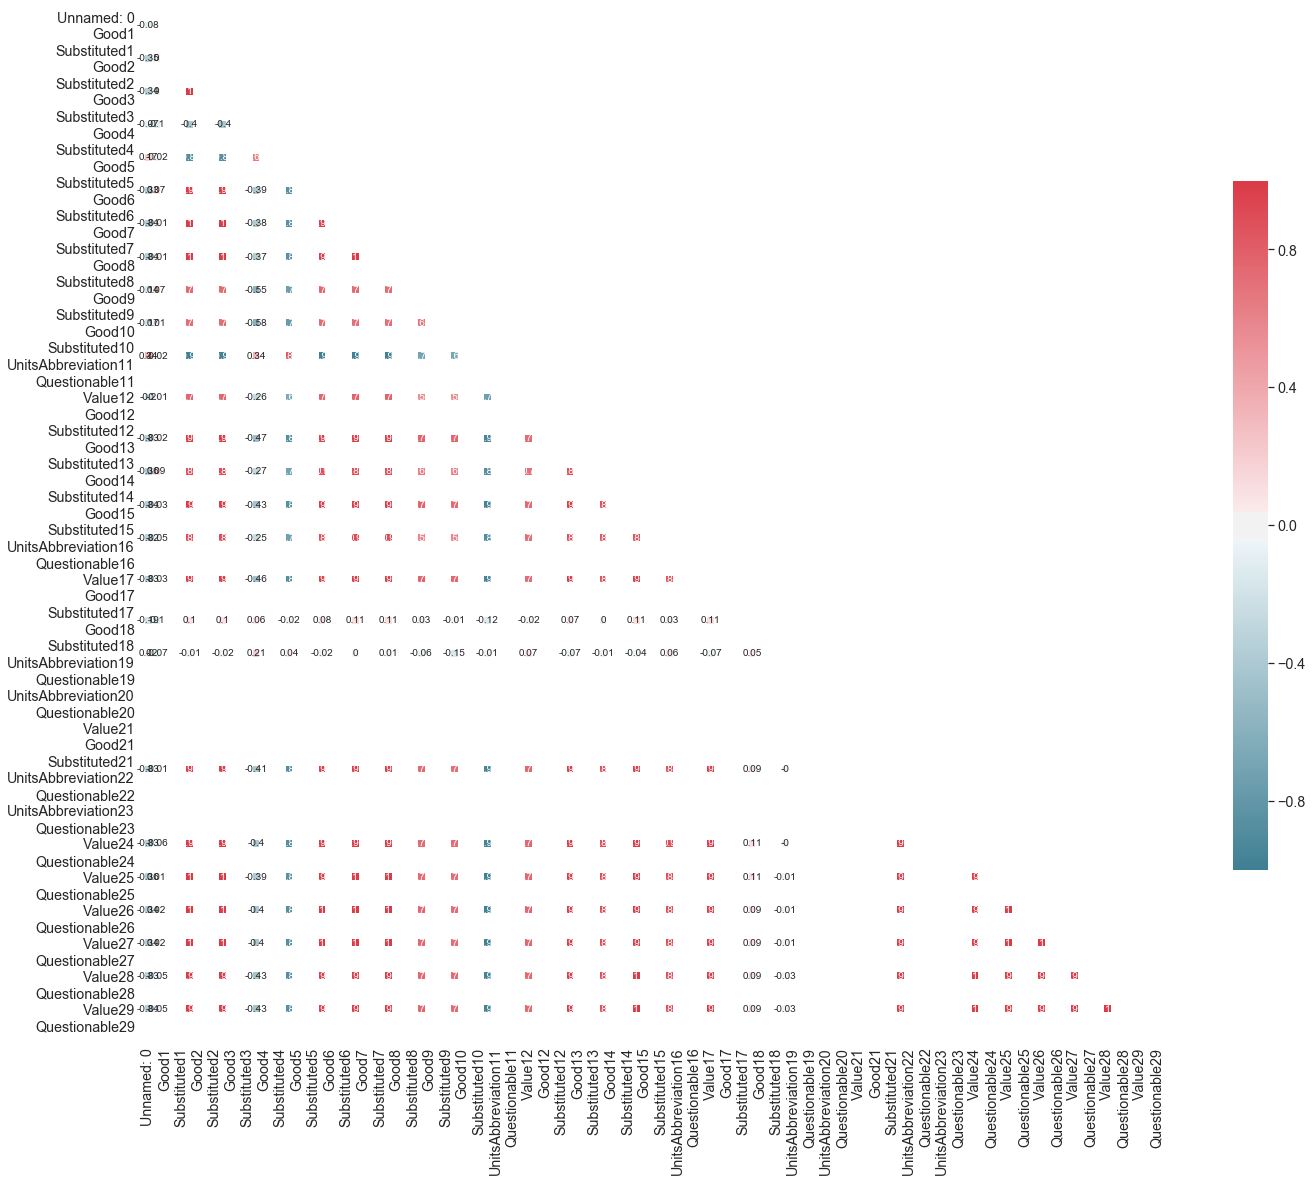

In [36]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [37]:
# first, drop all "worst" columns
cols = ['Good1', 
        'Questionable1', 
        'Substituted1', 
        'Good2', 
        'Questionable2', 
        'Substituted2', 
        'Good3', 
        'Questionable3', 
        'Substituted3', 
        'Good4', 
        'Questionable4', 
        'Substituted4', 
        'Good5', 
        'Questionable5', 
        'Substituted5', 
        'Good6', 
        'Questionable6', 
        'Substituted6', 
        'Good7', 
        'Questionable7', 
        'Substituted7', 
        'Good8', 
        'Questionable8', 
        'Substituted8', 
        'Good9', 
        'Questionable9', 
        'Substituted9', 
        'Good10', 
        'Questionable10', 
        'Substituted10', 
        'Good11', 
        'Questionable11', 
        'Substituted11', 
        'Good12', 
        'Questionable12', 
        'Substituted12', 
        'Good13', 
        'Questionable13', 
        'Substituted13', 
        'Good14', 
        'Questionable14', 
        'Substituted14', 
        'Good15', 
        'Questionable15', 
        'Substituted15', 
        'Good16', 
        'Questionable16', 
        'Substituted16', 
        'Good17', 
        'Questionable17', 
        'Substituted17', 
        'Good18', 
        'Questionable18', 
        'Substituted18', 
        'Good19', 
        'Questionable19', 
        'Substituted19', 
        'Good20', 
        'Questionable20', 
        'Substituted20',
        'Good21', 
        'Questionable21', 
        'Substituted21', 
        'Good22', 
        'Questionable22', 
        'Substituted22', 
        'Good23', 
        'Questionable23', 
        'Substituted23', 
        'Good24', 
        'Questionable24', 
        'Substituted24', 
        'Good25', 
        'Questionable25', 
        'Substituted25', 
        'Good26', 
        'Questionable26', 
        'Substituted26', 
        'Good27', 
        'Questionable27', 
        'Substituted27', 
        'Good28', 
        'Questionable28', 
        'Substituted28', 
        'Good29', 
        'Questionable29', 
        'Substituted29', ]
        
        
df = df.drop(cols, axis=1)

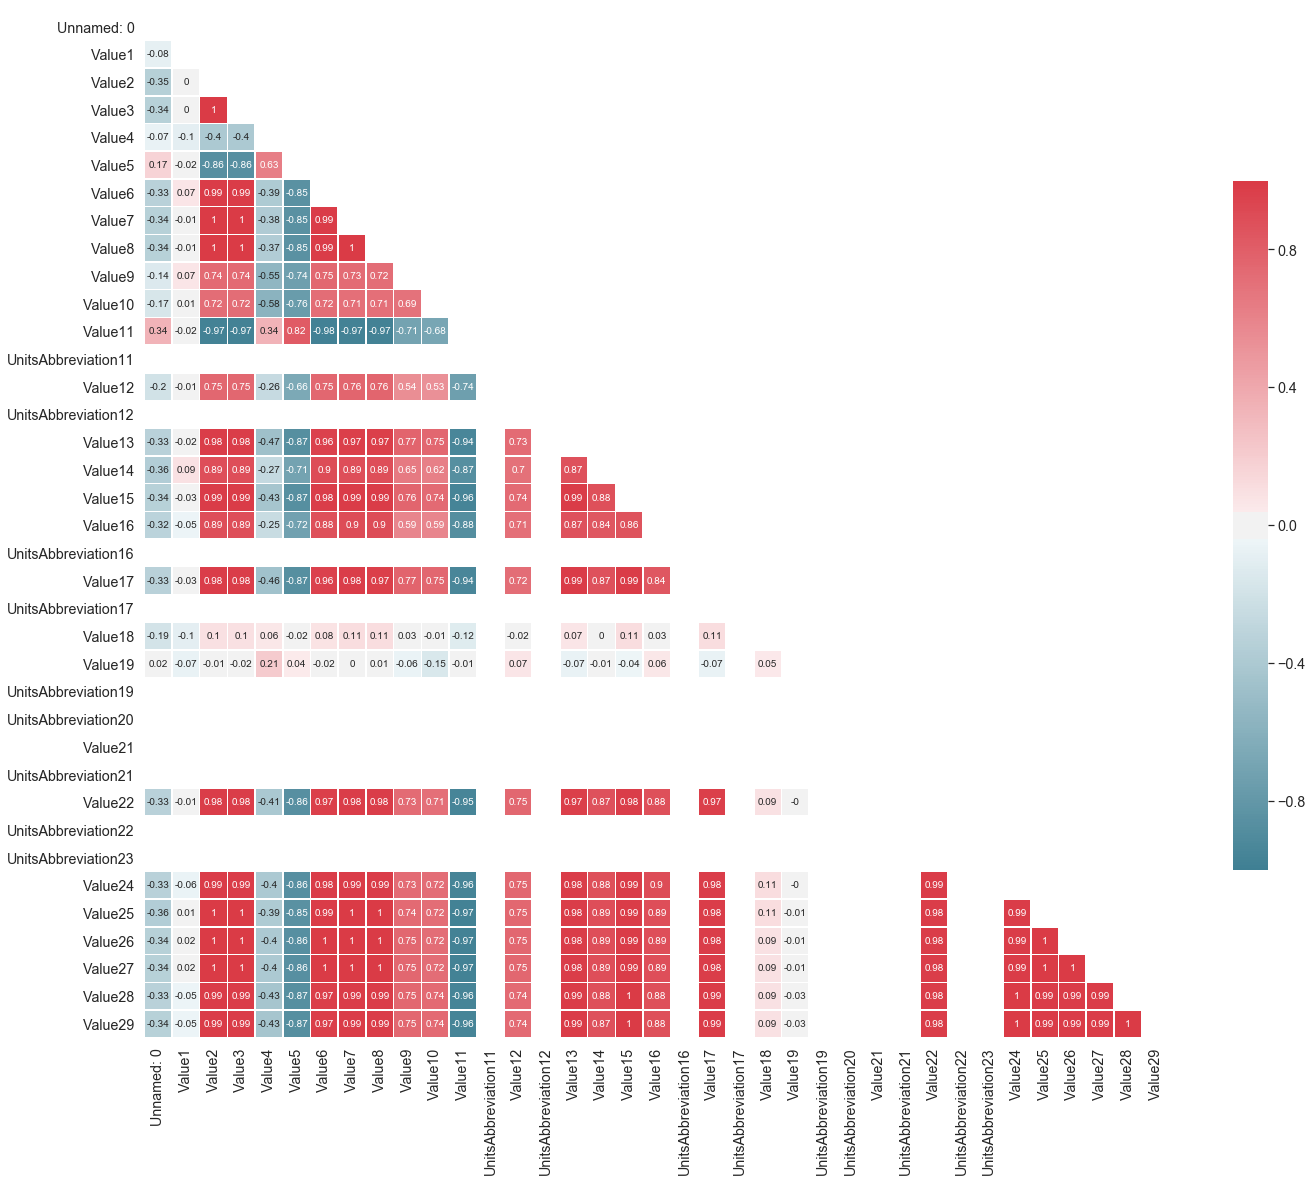

In [38]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 1 to 10079
Data columns (total 88 columns):
Unnamed: 0             10079 non-null int64
Value1                 10079 non-null float64
Timestamp1             10079 non-null object
UnitsAbbreviation1     10079 non-null object
Value2                 10079 non-null float64
Timestamp2             10079 non-null object
UnitsAbbreviation2     10079 non-null object
Value3                 10079 non-null float64
Timestamp3             10079 non-null object
UnitsAbbreviation3     10079 non-null object
Value4                 10079 non-null float64
Timestamp4             10079 non-null object
UnitsAbbreviation4     10079 non-null object
Value5                 10079 non-null float64
Timestamp5             10079 non-null object
UnitsAbbreviation5     10079 non-null object
Value6                 10079 non-null float64
Timestamp6             10079 non-null object
UnitsAbbreviation6     10079 non-null object
Value7                 10079 no

In [40]:
# first, drop all "worst" columns
cols = ['UnitsAbbreviation1',
       'UnitsAbbreviation2',
       'UnitsAbbreviation3',
       'UnitsAbbreviation4',
       'UnitsAbbreviation5',
       'UnitsAbbreviation6',
       'UnitsAbbreviation7',
       'UnitsAbbreviation8',
       'UnitsAbbreviation9',
       'UnitsAbbreviation10',
       'UnitsAbbreviation11',
       'UnitsAbbreviation12',
       'UnitsAbbreviation13',
       'UnitsAbbreviation14',
       'UnitsAbbreviation15',
       'UnitsAbbreviation16',
       'UnitsAbbreviation17',
       'UnitsAbbreviation18',
       'UnitsAbbreviation19',
       'UnitsAbbreviation20',
       'UnitsAbbreviation21',
       'UnitsAbbreviation22',
       'UnitsAbbreviation23',
       'UnitsAbbreviation24',
       'UnitsAbbreviation25',
       'UnitsAbbreviation26',
       'UnitsAbbreviation27',
       'UnitsAbbreviation28',
       'UnitsAbbreviation29',]
        
        
df = df.drop(cols, axis=1)

In [41]:
# first, drop all "worst" columns
cols = ['Timestamp1',
       'Timestamp2',
       'Timestamp3',
       'Timestamp4',
       'Timestamp5',
       'Timestamp6',
       'Timestamp7',
       'Timestamp8',
       'Timestamp9',
       'Unnamed: 0',
       'Timestamp11',
       'Timestamp12',
       'Timestamp13',
       'Timestamp14',
       'Timestamp15',
       'Timestamp16',
       'Timestamp17',
       'Timestamp18',
       'Timestamp19',
       'Timestamp20',
       'Timestamp21',
       'Timestamp22',
       'Timestamp23',
       'Timestamp24',
       'Timestamp25',
       'Timestamp26',
       'Timestamp27',
       'Timestamp28',
       'Timestamp29',]
        
        
df = df.drop(cols, axis=1)

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [ ]:
# first, drop all "worst" columns
cols = ['Value2',
       'Value3',
       'Value6',
       'Value7',
       'Value8',
       'Value14',
       'Value15',
       'Value16',
       'Value17',
       'Value21',
       'Value22',
       'Value24',
       'Value25',
       'Value26',
       'Value27',
       'Value28',
       'Value29','Timestamp10']
        
        
df = df.drop(cols, axis=1)

In [ ]:
# first, drop all "worst" columns
cols = ['Value20',
       'Value23',]
        
        
df = df.drop(cols, axis=1)

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [ ]:
df